In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("MedHouseValue")], axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


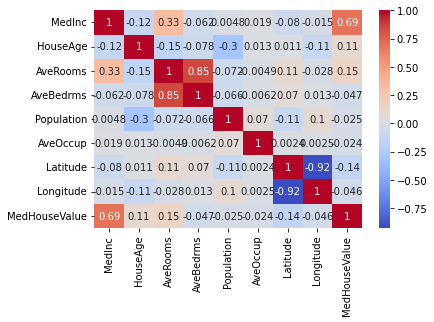

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("R2 Score_lr:", r2_score(y_test, y_pred))
print("MSE_lr:", mean_squared_error(y_test, y_pred))
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("R2 Score_xgb:", r2_score(y_test, y_pred))
print("MSE_xgb:", mean_squared_error(y_test, y_pred))


R2 Score_lr: 0.6007687748953807
MSE_lr: 0.5499322340050473
R2 Score_xgb: 0.8366756222339582
MSE_xgb: 0.2249757390815983


 99%|===================| 4076/4128 [00:17<00:00]        

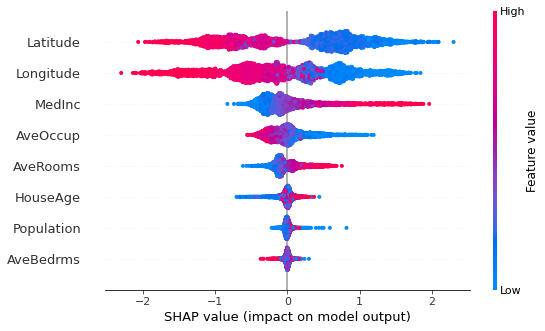

In [18]:
import shap
shap.initjs()

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, features=X_test, feature_names=data.feature_names)

# Force plot for one prediction
shap.plots.force(shap_values[0])


In [19]:
import joblib
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(lr_model, 'xgb_model.pkl')
joblib.dump(scaler, "scaler.pkl")
joblib.dump(data.feature_names, "features.pkl")


['features.pkl']